#Lectura y procesamiento de los resultados de los mejores modelos CNN

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de CNN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsCNN1S = pd.read_excel('grilla_CNN_NARX_1STEPS.xlsx', header=0)
summaryModelsCNN2S = pd.read_excel('grilla_CNN_NARX_2STEPS.xlsx', header=0)
summaryModelsCNN3S = pd.read_excel('grilla_CNN_NARX_3STEPS.xlsx', header=0)
summaryModelsCNN4S = pd.read_excel('grilla_CNN_NARX_4STEPS.xlsx', header=0)

grilla_CNN_NARX_AQP = pd.concat([summaryModelsCNN1S, summaryModelsCNN2S], ignore_index=True)
grilla_CNN_NARX_AQP = pd.concat([grilla_CNN_NARX_AQP, summaryModelsCNN3S], ignore_index=True)
grilla_CNN_NARX_AQP = pd.concat([grilla_CNN_NARX_AQP, summaryModelsCNN4S], ignore_index=True)

grilla_CNN_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    3072 non-null   float64
 1   delayedSteps            3072 non-null   int64  
 2   nameModel               3072 non-null   object 
 3   nameHistory             3072 non-null   object 
 4   nameConfiguration       3072 non-null   object 
 5   timeTrain (in seconds)  3072 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 144.1+ KB


##La cantidad de modelos generados para el CNN NARX de DDFO fue de 3071

In [5]:
rslt_df = grilla_CNN_NARX_AQP.sort_values('MAPE')
total = grilla_CNN_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_CNN_NARX_AQP.describe()

Tiempo total: 277724.58999999997


MAPE  delayedSteps  timeTrain (in seconds)
count  3072.000000   3072.000000              3072.00000
mean     71.242313      2.500000                90.40514
std      34.169402      1.118216                 4.12366
min      13.941892      1.000000                45.13000
25%      31.129503      1.750000                87.72000
50%      99.620615      2.500000                90.69000
75%      99.628414      3.250000                92.41000
max     100.000000      4.000000               141.96000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 277724, lo que equivale a 77 horas aproximadamente. Además se tienen las estadisticas resumen.

In [6]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
1745  13.941892  ...                   89.15
2736  14.184521  ...                   93.06
1649  15.014819  ...                   89.01
2437  15.373816  ...                   86.91
924   15.478763  ...                   92.11
33    15.743363  ...                   93.43
1841  15.743803  ...                   89.22
1561  16.291074  ...                   86.27
3024  16.344456  ...                   92.49
2129  16.594350  ...                   86.04
1553  16.851503  ...                   87.76
2449  16.920852  ...                   84.84
1941  16.933775  ...                   90.22
1937  17.115233  ...                   86.29
977   17.202911  ...                   91.82
2641  17.226091  ...                   87.52
881   17.283755  ...                   90.92
789   17.541431  ...                   91.55
145   17.624393  ...                   96.25
1600  17.639637  ...                   86.28
785   18.229399  ...                   92.03
885   18.599624  ...                   91.70
2545  18.646682  ...                   84.43
1661  18.794099  ...                   89.54
1173  18.848418  ...                   90.71
2225  19.046830  ...                   90.19
1073  19.150010  ...                   92.27
2492  19.191599  ...                   91.78
1765  19.198179  ...                   89.98
2033  19.327562  ...                   88.10
1040  19.373372  ...                   92.79
2560  19.629612  ...                   91.22
865   19.694644  ...                   91.56
1077  19.778792  ...                   90.81
1577  19.815608  ...                   85.72
1609  19.836420  ...                   84.17
2189  19.841815  ...                   90.22
1140  19.882192  ...                   90.04
1265  19.929767  ...                   90.52
1613  20.030073  ...                   86.27
2660  20.046063  ...                   88.76
2176  20.050987  ...                   87.08
944   20.081085  ...                   91.95
1136  20.144444  ...                   91.03
37    20.217569  ...                   88.75

[45 rows x 6 columns]

In [7]:
rslt_df.iloc[0,:]

MAPE                                                                13.9419
delayedSteps                                                              3
nameModel                 results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
nameHistory               results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
nameConfiguration         results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
timeTrain (in seconds)                                                89.15
Name: 1745, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 13.9, pero que tiene pocos retardos, especificamente 3 retardo.

In [8]:
bestModel = rslt_df.iloc[0,:]
print(bestModel)

MAPE                                                                13.9419
delayedSteps                                                              3
nameModel                 results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
nameHistory               results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
nameConfiguration         results/CNN_313_1_64_3_sigmoid_causal_32_relu_...
timeTrain (in seconds)                                                89.15
Name: 1745, dtype: object


In [9]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S_history.npy
results/CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S_config.npy
results/CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S.h5


In [11]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S_history.npy
CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S_config.npy
CNN_313_1_64_3_sigmoid_causal_32_relu_mean_absolute_error_3S.h5


In [16]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [306.4896240234375, 306.22760009765625, 305.9729919433594, 305.7247009277344, 305.48065185546875, 305.2395324707031, 305.0106201171875, 304.78912353515625, 304.5803527832031, 304.3696594238281, 304.1563720703125, 303.9364318847656, 303.71014404296875, 303.4770812988281, 303.2341613769531, 302.9880065917969, 302.72991943359375, 302.4647521972656, 302.1907043457031, 301.906982421875, 301.6146545410156, 301.3121643066406, 300.99908447265625, 300.6746520996094, 300.33941650390625, 299.9967346191406, 299.6360778808594, 299.26910400390625, 298.8880310058594, 298.494140625, 298.0906677246094, 297.67303466796875, 297.2400817871094, 296.7952575683594, 296.3387756347656, 295.8638000488281, 295.3768615722656, 294.8763732910156, 294.36187744140625, 293.82928466796875, 293.2822570800781, 292.7212219238281, 292.143310546875, 291.5615234375, 290.9508056640625, 290.3318786621094, 289.69610595703125, 289.0487365722656, 288.3807067871094, 287.7057189941406, 287.0034484863281, 286.2916564941406,

In [17]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


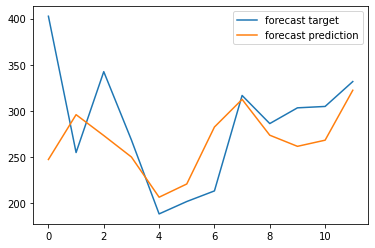

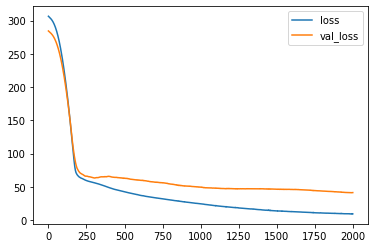

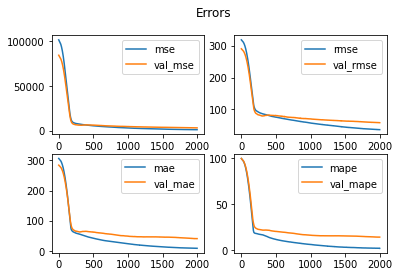

In [18]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [19]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
      prediction = float(saved_model.predict(xAux))
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [20]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [21]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [22]:
dataTrainNarmax.to_csv('dataTrainNarmaxCNN.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledCNN.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxCNN.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledCNN.csv', index = False)

In [23]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)      error
3                 2.0              2.0                317.120  13.737338
4                 2.0              3.0                210.517  57.717329
5                 2.0              4.0                207.364  72.797596
6                 2.0              5.0                263.043  41.186229
7                 2.0              6.0                248.958  49.390335
8                 3.0              2.0                344.291   2.270517
9                 3.0              3.0                248.428  37.905725
10                3.0              4.0                281.420  24.926973
11                3.0              5.0                243.568  19.770193
12                3.0              6.0                308.178   5.595011